# Laborator 1, partea 4 - Accentuarea contrastului pentru imagini color 

In [3]:
# Fiecare lucrare de laborator se va finaliza prin printarea script-ului 
#   sub forma unui raport si incarcarea lui online 
# Rapoartele trebuie incarcate pana la sfarsitul orei de laborator!!!

# Lucrare de laborator realizata de:
NumeStudent = " "
Specializare = " " # TM/ TC/ SICAS
print("Lucrare de laborator realizata de: ", NumeStudent)
print(" \t de la specializarea: ", Specializare)


Lucrare de laborator realizata de:   
 	 de la specializarea:   


In [4]:
#import sys
#sys.path.append('../../_PyUtilFcts/')
import ColorSpaceFunctions as clsFcts

import os
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# In[0] - Setare parametrii necesari aplicatiei 

# Selectare imagine pe care testam aplicatia
# Se recomanda sa se pastreze imgsPath = "D:/_TestImages" - fiind directorul 
#       principal care contine subdirectoarele cu imaginile sugerate
# La setare imgName se specifica si subdirectorul din care dace parte imaginea
imgsPath = "D:/_TestImages"
imgName = 'ImgTstColor/sutbutaerialorig.bmp' # atentie sa fie scris corect numele imaginii!!!!
# Sugestie imagini pentru testare (dir/ imgs):
#  ImgTstColor: fluture.jpg, frog.jpg, sutbutaerialorig.bmp, Peppers_fc.png, 
#           peisaj5intunecat.jpg, chatt1_1024.bmp, 4.1.02.bmp, _gardenia_sa.jpg
             
# Selectie spatiu de culoare in care se realizeaza operatia
#   Se selecteaza ca si o pozitie din vectorul ColorSpacesList
#   ColorSpacesList = ['RGB', 'YCrCb', 'HSV', 'Lab', 'gray']
#       0 - 'RGB' (nu se alege pentru a fi spatiu in care realizam procesarea), 
#       1 - 'YCrCb',      2 - 'HSV',           3 - 'Lab'
SelClrSp = 3 # se selecteaza ca si o pozitie din vectorul ColorSpacesList

# Selectie componenta pentru procesare 
#       se alege 0 pentru C0, 1 pentru C1 sau 2 pentru C2
# exemplu: YCbCr - 0=Y, 1=Cb, 2=Cr; HSV - 0=H, 1=S, 2=V; Lab - 0=L, 1=a, 2=b 
# Componenta Y, V sau L - sunt componente de luminta 
#       echivalent a imaginii pe nivele de gri
ClrCompNr = 0; # se alege 0, 1 sau 2 pentru - C0, C1 sau C2

'''
Programul se va rula pe mai multe imagini, la fiecare imagine se noteaza: 
    - Numărul de clase/regiuni omogene identificate vizual (segmentare manuală)
    - Numărul de clase/regiuni omogene obținut în urma unei segmentării corecte 
        (rezultate în urma a mai multor setări/modificari a parametrilor)
    - Care considerați că este cea mai bună modalitate de segmentare pentru 
        imaginea curenta (spatiul de culoare, componenta procesata, FiltWindowLen, MinMaxDif )
    - Se adauga printscreen cu rezultatul optim obtinut 
'''

'\nProgramul se va rula pe mai multe imagini, la fiecare imagine se noteaza: \n    - Numărul de clase/regiuni omogene identificate vizual (segmentare manuală)\n    - Numărul de clase/regiuni omogene obținut în urma unei segmentării corecte \n        (rezultate în urma a mai multor setări/modificari a parametrilor)\n    - Care considerați că este cea mai bună modalitate de segmentare pentru \n        imaginea curenta (spatiul de culoare, componenta procesata, FiltWindowLen, MinMaxDif )\n    - Se adauga printscreen cu rezultatul optim obtinut \n'


   ----- INFO - In[1] Selectie imagine -----

Imaginea originala, din fisierul : D:/_TestImages\ImgTstColor/sutbutaerialorig.bmp
         Shape: (366, 500, 3) , Type : uint8


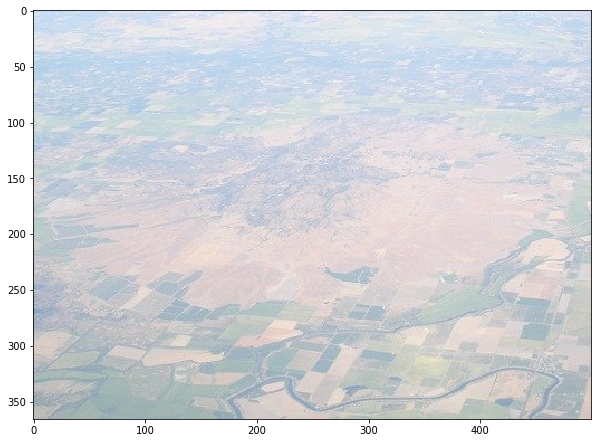

In [6]:
# In[1] - Selectie imagine 
# Setare cale locatie imagini si nume fisier imagine
print('\n   ----- INFO - In[1] Selectie imagine -----\n')

imgFile = os.path.sep.join([imgsPath, imgName])
print("Imaginea originala, din fisierul :", imgFile)

imgBGR = cv2.imread(imgFile) 
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB) 
print("         Shape:" , imgRGB.shape,", Type :" , imgRGB.dtype)

fig = plt.figure(figsize=(10,10)); plt.imshow(imgRGB); plt.show()


  ----- INFO - In[2] Conversie Spatiu de Culoare, din R/G/B in L/a/b


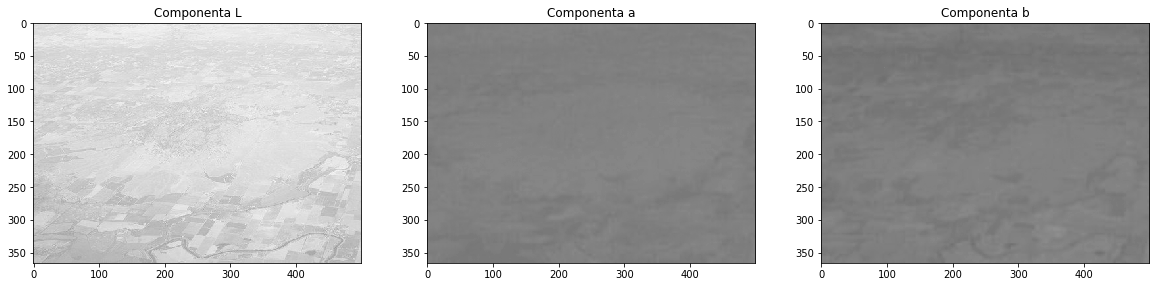

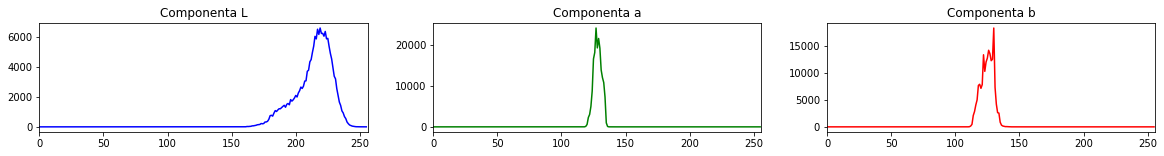

In [7]:
# In[2] - Selectie parametrii procesare 
ColorSpacesList = ['R/G/B', 'Y/Cr/Cb', 'H/S/V', 'L/a/b', 'gray'] 

NewClrSp = ColorSpacesList[SelClrSp] 
OrgClrSp = ColorSpacesList[0] # 0 - pentru RGB - imaginea la deschidere este RGB
print('\n  ----- INFO - In[2] Conversie Spatiu de Culoare, din ' + OrgClrSp + ' in '+ NewClrSp)
ImgClrSp = clsFcts.ConvertColorSpace(imgRGB, OrgClrSp , NewClrSp)

CompPr = ImgClrSp[:,:,ClrCompNr]; # extragere componenta pentru procesare 

clsFcts.plotColorComponents(ImgClrSp, NewClrSp)
clsFcts.plotColorHistograms(ImgClrSp, NewClrSp)


   ----- INFO - In[3] Accentuare contrast utilizand functia liniara pe portiuni -----



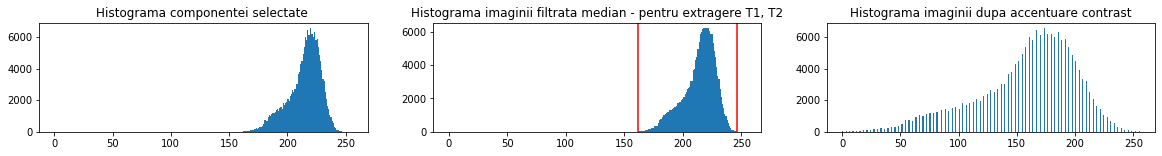

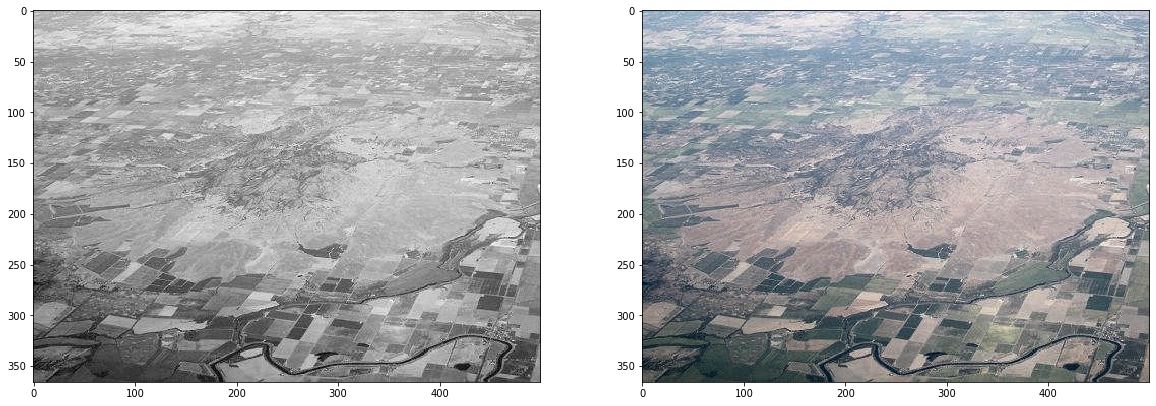


-------------------------------------------------------------------


In [8]:
# In[3] Accentuare contrast functia liniara pe portiuni
print('\n   ----- INFO - In[3] Accentuare contrast utilizand functia liniara pe portiuni -----\n')
# Calculare a si b considerand histograma imaginii imgGray  
#   - T1 - intensitatea minima care apare in imagine
#   - T2 - intensitarea maxima care apare in imagine 
ImgClrSpMod = ImgClrSp.copy()
imgComp = ImgClrSp[:,:,ClrCompNr]

fig = plt.figure(figsize=(20,2)); 
fig.add_subplot(131)
plt.hist(imgComp.ravel(),256,[0,256]); 
plt.title("Histograma componentei selectate ", color='black');

# Calcul automat T1 si T2 

counts, bins = np.histogram(imgComp, range(256))
counts[counts<20] = 0
from scipy.signal import medfilt
counts = medfilt(counts,5)
loc = np.where(counts>0)

T1 = loc[0][0]
T2 = loc[0][-1]
fig.add_subplot(132)
plt.bar(bins[:-1], counts, width=1, edgecolor='none'); #plt.xlim([-0.5, 255.5]); 
plt.axvline(T1, color='red');plt.axvline(T2, color='red');
plt.title("Histograma imaginii filtrata median - pentru extragere T1, T2", color='black'); 

# Calcul a si b considerand T1 si T2
a = 255/(T2-T1)
b = -T1

imgGrayAj = a * (imgComp + b)

imgGrayAj[imgGrayAj>255] = 255; imgGrayAj[imgGrayAj<0] = 0;
ImgClrSpMod[:,:,ClrCompNr] = imgGrayAj

fig.add_subplot(133)
plt.hist(imgGrayAj.ravel(),256,[0,256]); 
plt.title("Histograma imaginii dupa accentuare contrast", color='black'); plt.show()

fig = plt.figure(figsize=(20,10)); 
fig.add_subplot(121)
plt.imshow(imgGrayAj, cmap='gray', vmin=0, vmax=255); 

fig.add_subplot(122)
plt.imshow(clsFcts.ConvertColorSpace(ImgClrSpMod, NewClrSp , OrgClrSp)); plt.show()

print('\n-------------------------------------------------------------------')


 [Info] Modificare/accentuare contrast -  Egalizare de Histograma 


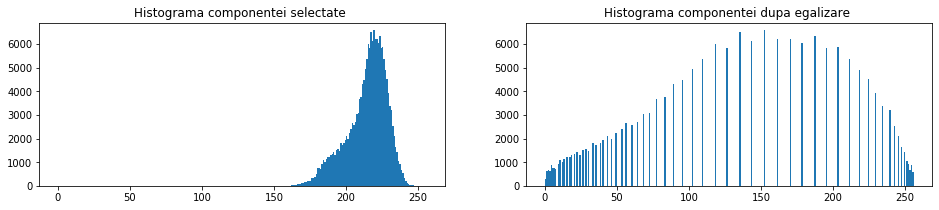

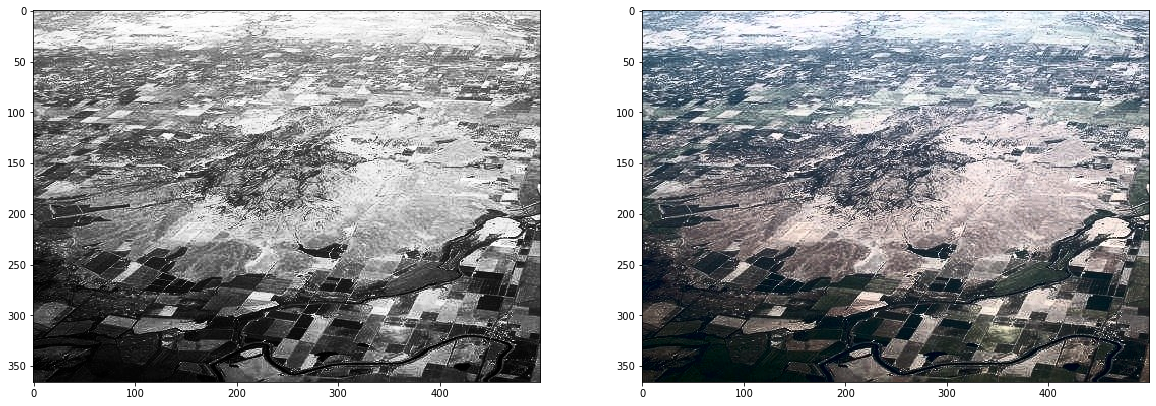

In [9]:
#%%
# Accentuare de contrast
print('\n [Info] Modificare/accentuare contrast -  Egalizare de Histograma ')

ImgClrSpMod = ImgClrSp.copy()
imgColEq = cv2.equalizeHist(ImgClrSp[:,:,ClrCompNr])
fig = plt.figure(figsize=(16,3)); fig.add_subplot(121)
plt.hist(imgComp.ravel(),256,[0,256]); 
plt.title("Histograma componentei selectate ", color='black');
fig.add_subplot(122); plt.hist(imgColEq.ravel(),256,[0,256]); 
plt.title("Histograma componentei dupa egalizare ", color='black'); plt.show() 

ImgClrSpMod[:,:,ClrCompNr] = imgColEq
fig = plt.figure(figsize=(20,10)); fig.add_subplot(121)
plt.imshow(imgColEq, cmap= 'gray', vmin=0, vmax=255);
fig.add_subplot(122); plt.imshow(clsFcts.ConvertColorSpace(ImgClrSpMod, NewClrSp , OrgClrSp)); plt.show()
